# Dragon


The dragon curve is generated using a simple recursion. As one might imagine the result is a type of fractal.



The concept is to commence with a single line segment on the xy-plane with one end identified as the origin. 
This segment will be replaced with two segments, both of which will each be replaced by two segments, and so
on to some desired recursive degree.



A single iteration of the algorithm begins at the origin and walks the present sequence of segments. The
first segment is replaced by two end-to-end segments that are at right angles to one another. The distal
ends of these two segments are simply the endpoints of this first segment. An arbitrary direction is
chosen, left or right, for this excursion. The walk continues to the second segment, and the third and
so on to the end. For each successive segment the sense of the excursion alternates left-right-left-right 
etcetera. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# a location is an (x, y) 2-tuple
# a transform matrix is a (columns-first) 4-tuple; so indices are 00 10 01 11
#   (00 01) is where i-hat goes; etc
# The M() function multiplies a matrix on the left by the vector on the right


lr = [.5, -.5,  .5, .5]
rr = [.5,  .5, -.5, .5]


def M(t, v): return(t[0]*v[0]+t[1]*v[1], t[2]*v[0]+t[3]*v[1])


def Dragon(xd0, xd1, dd0, dd1, power):
    '''
    to some depth: iteratively generate a dragon curve
    (xd0, xd1) is the starting point, (dd0, dd1) represents to first segment from that point
    power is the number of iterations; end segment count = 2**power
    The Heighway dragon is characterized by alternate-direction bending of each segment.
    This is done here using a bool flag called 'left'
    '''
    x = [(xd0, xd1)]; x.append((xd0 + dd0, xd1 + dd1))
    for p in range(power):
        left, xp = True, [(x[0][0], x[0][1])]
        for i in range(1, len(x)):
            x0, x1 = x[i-1], x[i]
            xs     = M(lr, (x1[0] - x0[0], x1[1] - x0[1])) \
                       if left else M(rr, (x1[0] - x0[0], x1[1] - x0[1]))
            xp.append((x0[0] + xs[0], x0[1] + xs[1]))
            xp.append((x1[0], x1[1]))
            left = True - left
        x = xp.copy()
    return x

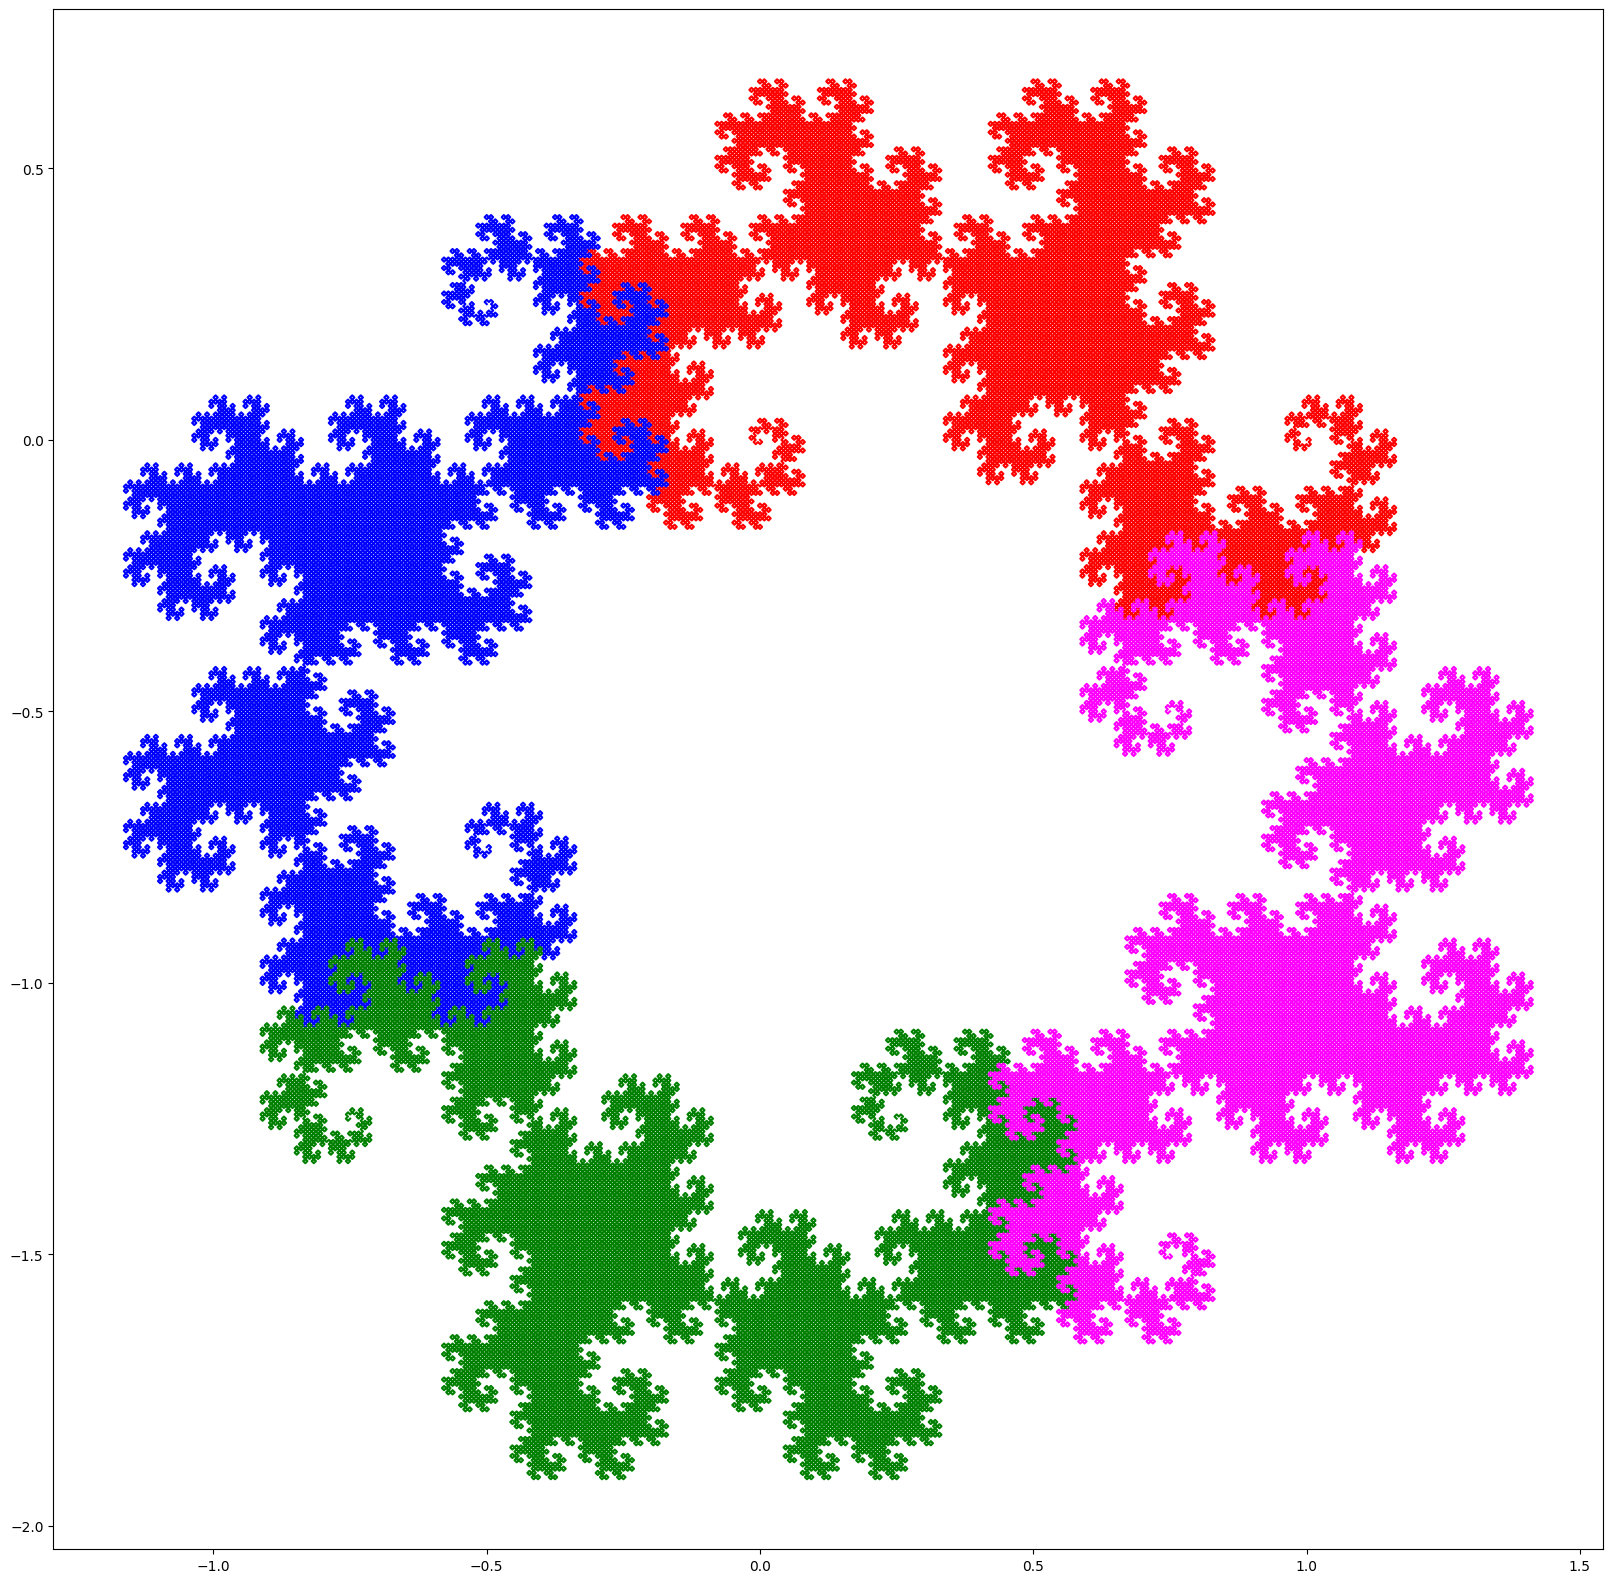

In [3]:
img,ax=plt.subplots(figsize=(20, 20))
power = 15
x = Dragon( .00,   .00,   1,  0, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='red')
x = Dragon(-.50,  -.75,   0,  1, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='blue')
x = Dragon( .25, -1.25,  -1,  0, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='green')
x = Dragon( .75, -0.50,  0,  -1, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='magenta')

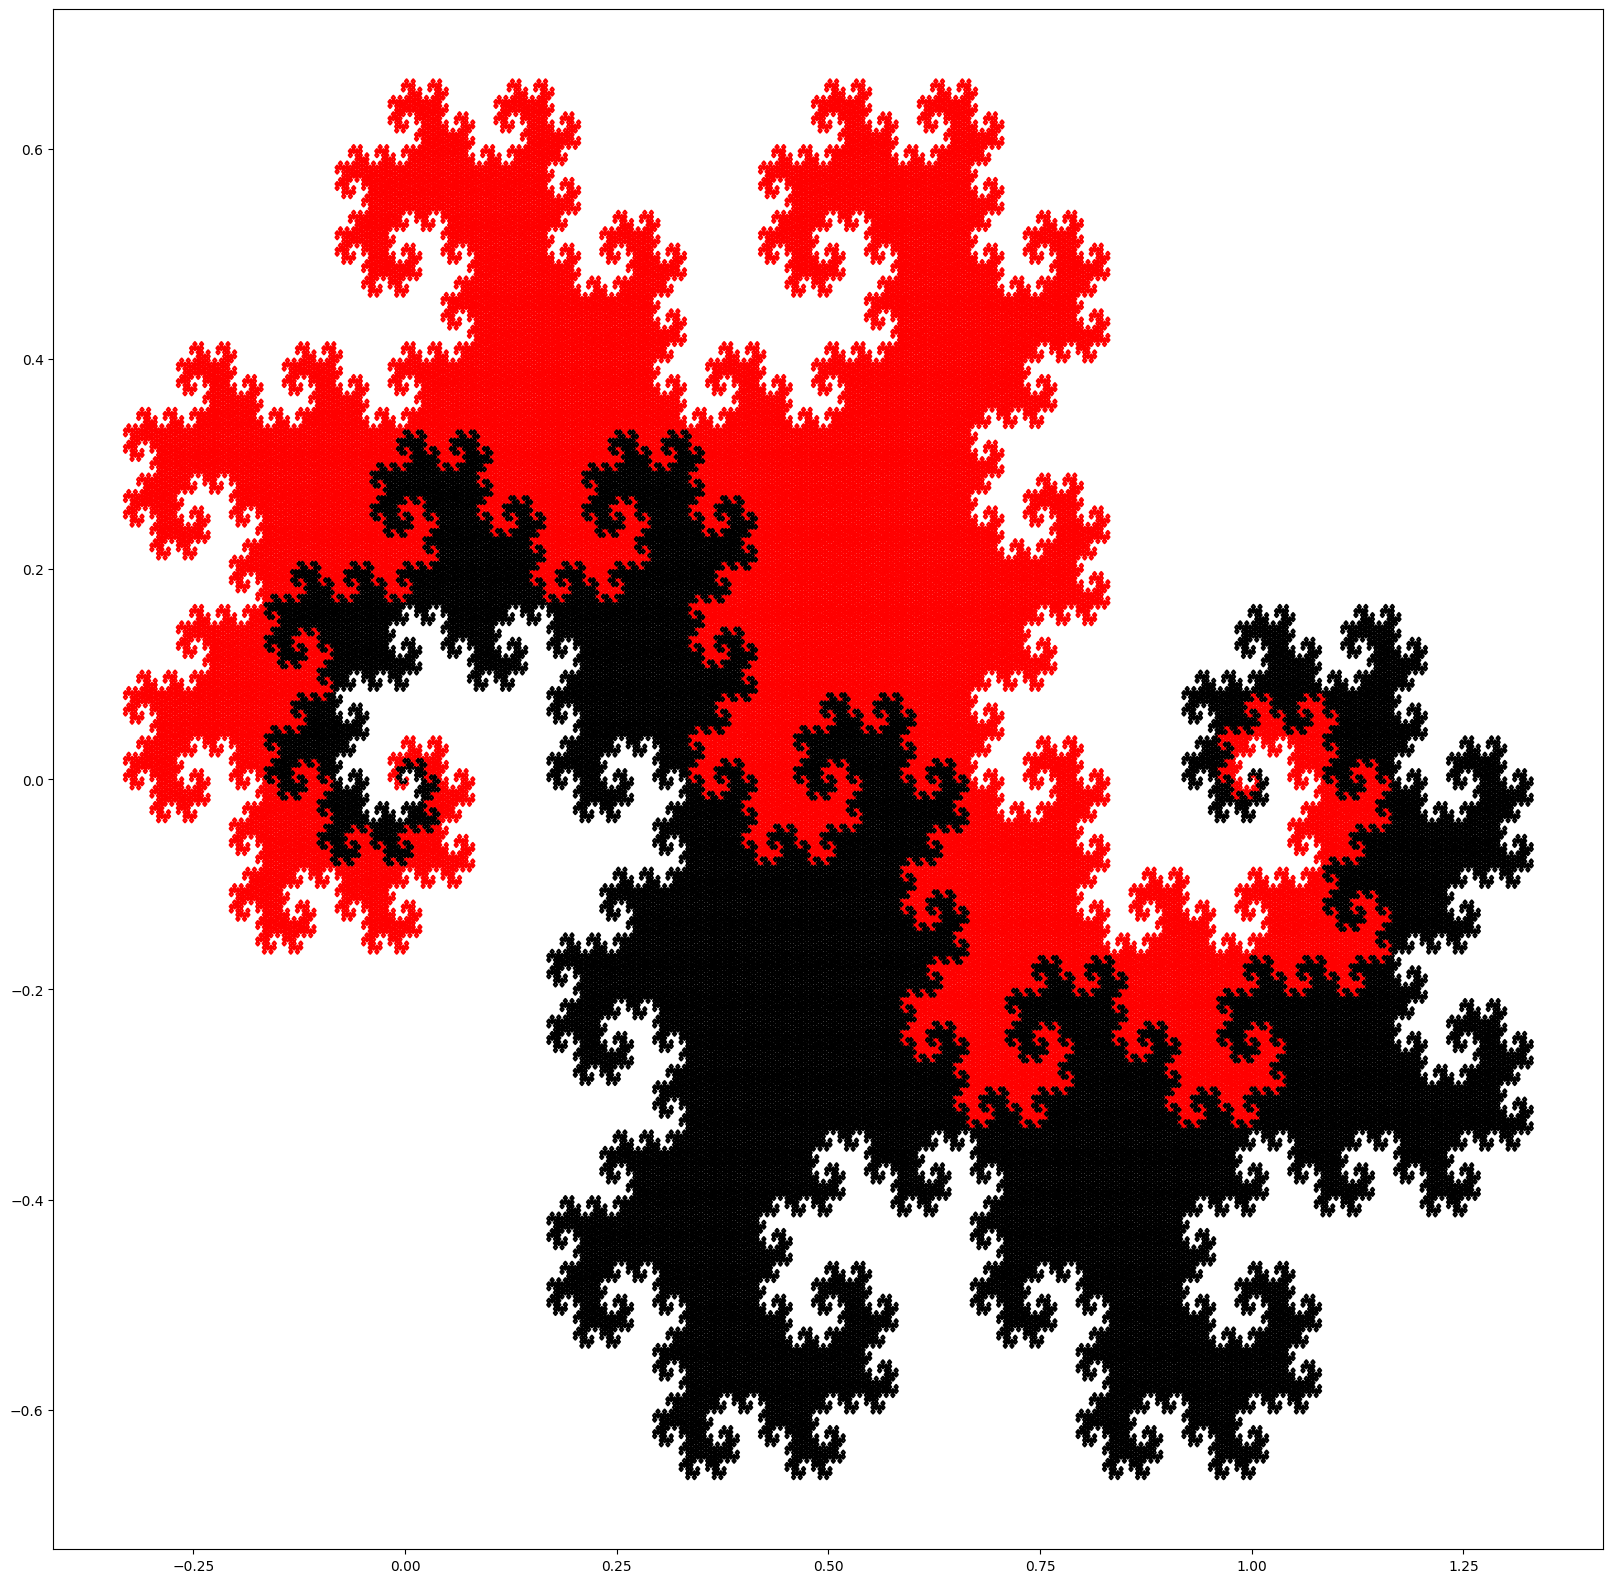

In [4]:
img,ax=plt.subplots(figsize=(20, 20))
power = 17
x = Dragon(    0,      0,   1,  0, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='red')
x = Dragon(    1,      0,   -1,  0, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='black')


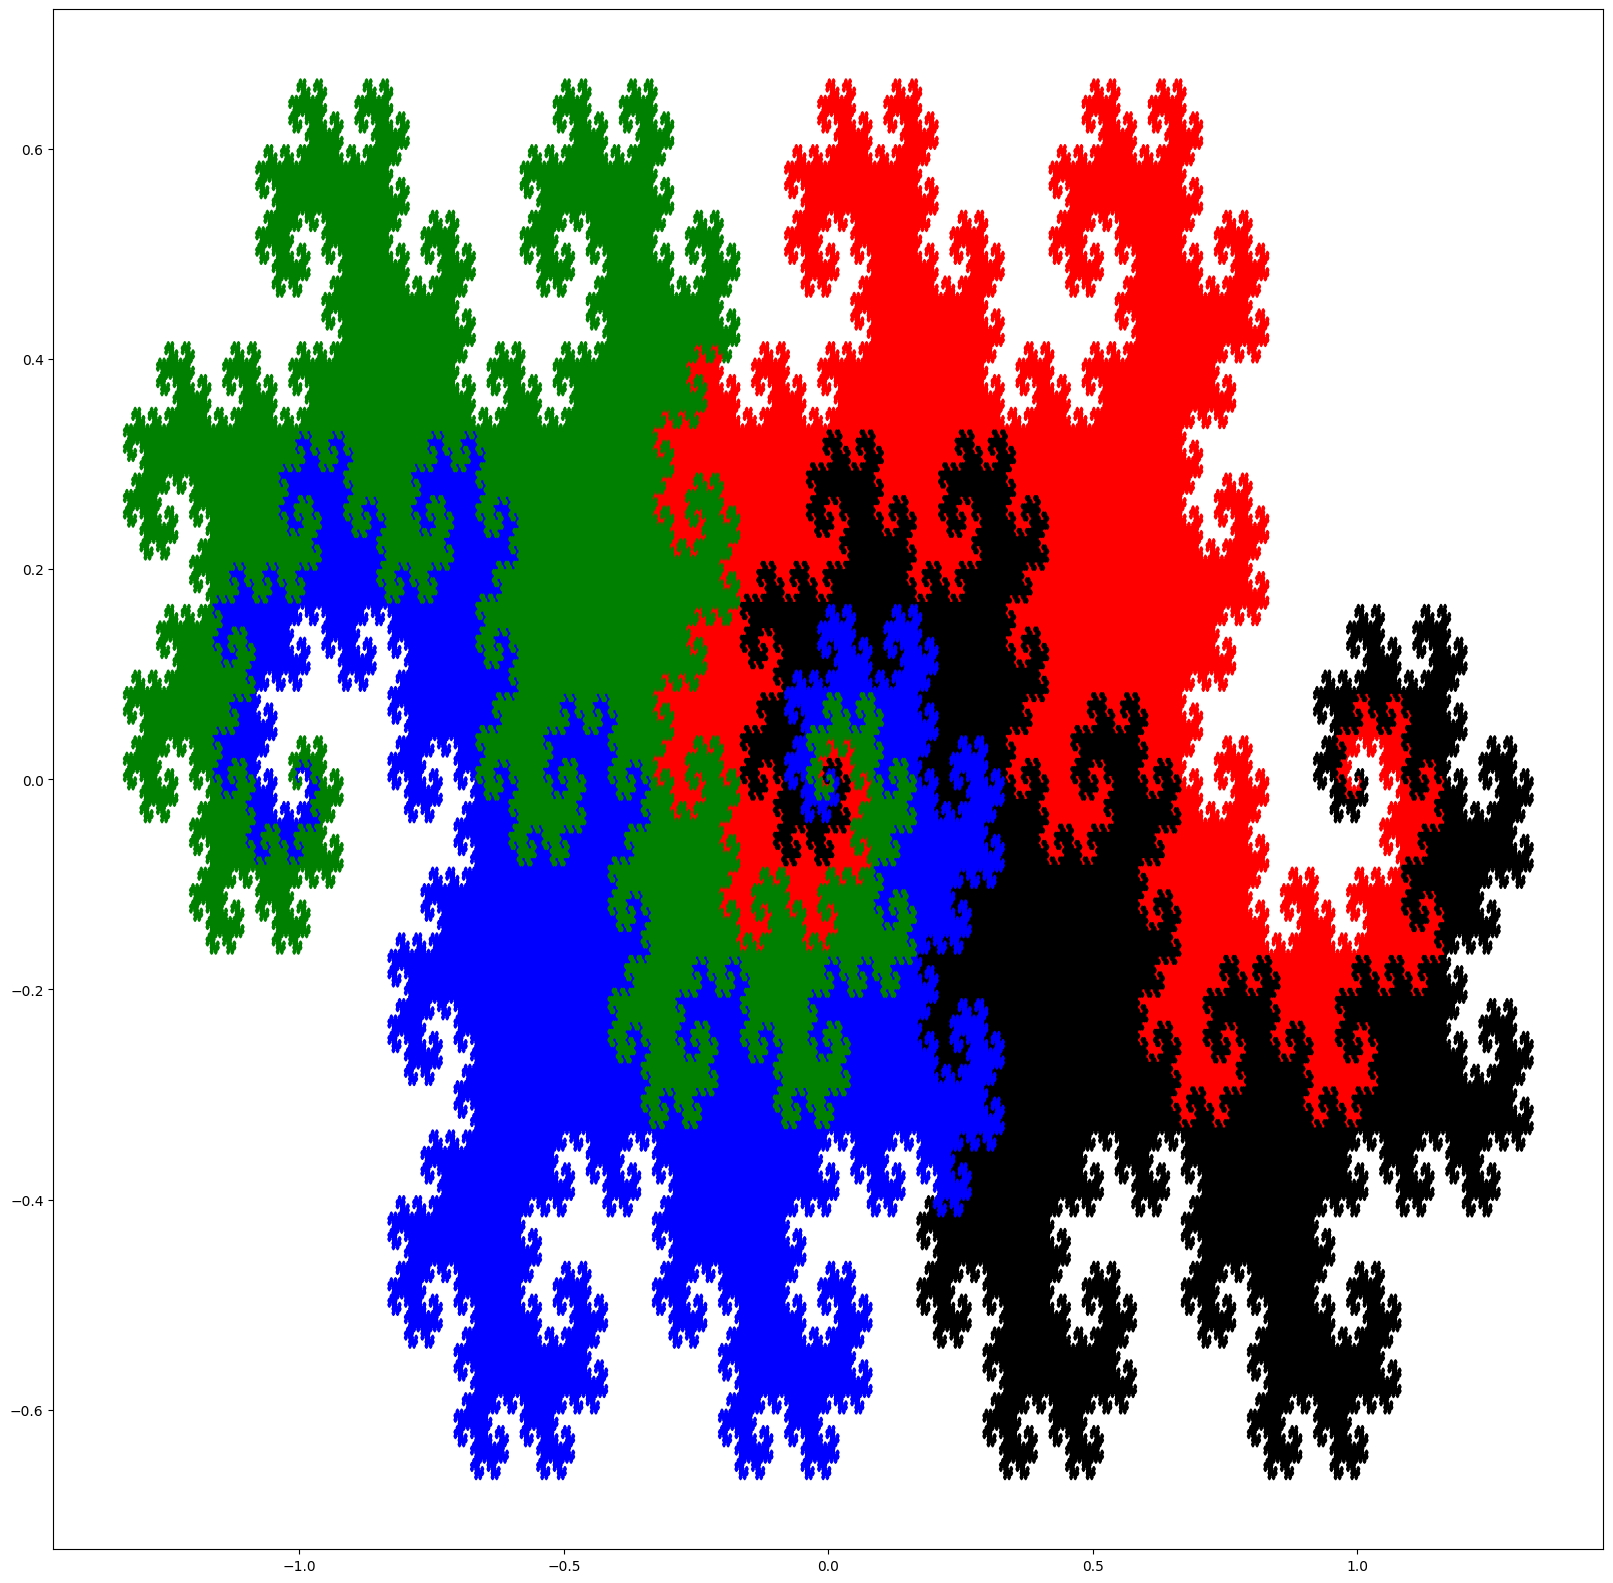

In [5]:
img,ax=plt.subplots(figsize=(20, 20))
power = 17
x = Dragon(    0,      0,    1,  0, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='red')
x = Dragon(    1,      0,   -1,  0, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='black')
x = Dragon(    0,      0,   -1,  0, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='blue')
x = Dragon(   -1,      0,    1,  0, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='green')


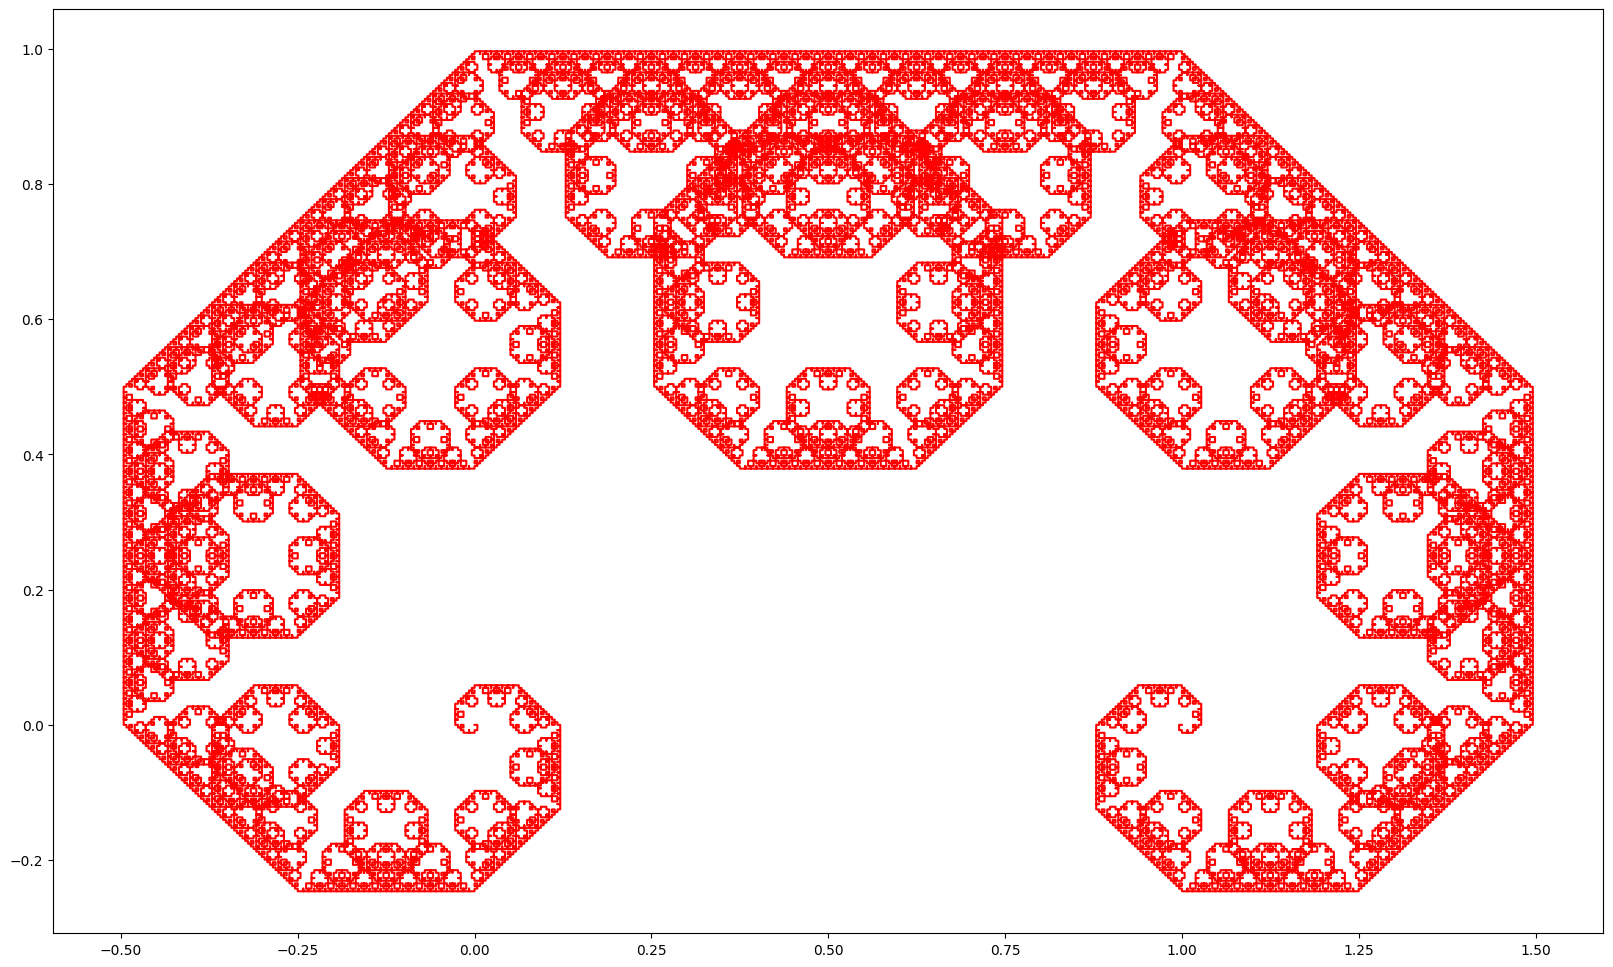

In [6]:
def Levy(xd0, xd1, dd0, dd1, power):
    '''
    The Levy curve eliminates the alternation of the dragon curve: All segments are bent to the left.
    '''
    x = [(xd0, xd1)]; x.append((xd0 + dd0, xd1 + dd1))
    for p in range(power):
        xp = [(x[0][0], x[0][1])]
        for i in range(1, len(x)):
            x0, x1 = x[i-1], x[i]
            xs     = M(lr, (x1[0] - x0[0], x1[1] - x0[1]))
            xp.append((x0[0] + xs[0], x0[1] + xs[1]))
            xp.append((x1[0], x1[1]))
        x = xp.copy()
    return x

img,ax=plt.subplots(figsize=(20, 12))
power = 16
x = Levy(    0,      0,   1,  0, power); xa, ya = [x[i][0] for i in range(len(x))], [x[i][1] for i in range(len(x))]; ax.plot(xa, ya, color='red')


In [2]:
from turtle import Turtle, tracer, update, Screen

# search 'turtle graphics documentation' to get (for example) a URL
# https://docs.python.org/3/library/turtle.html

def x_substitute(): return 'y+x+y'

def y_substitute(): return 'x-y-x'

def process_string(s):
    result = ''
    for c in s:
        if c == 'x': result = result + x_substitute()
        elif c == 'y': result = result + y_substitute()
        else: result = result + c
    return result

# code golf main program
t = Turtle()
tracer(0,0)
t.penup()
t.width(1.5)
t.setpos(-150, -150)
t.pendown()

move_distance = 15; turn = 80
s = 'x'
for go in '123456789': s = process_string(s)
for c in s:
    if   c == '+': t.pencolor('magenta'); t.left(turn);  t.forward(move_distance)
    elif c == '-': t.pencolor('black');   t.right(turn); t.forward(move_distance)
update()


TclError: no display name and no $DISPLAY environment variable

stuck... career dead end of next step? 5th cohort no signups; but 4th cohort sings praises. I2 bad marketing. Who talks to RCDs to drum up business? Nobody apparently. AT is just knocking on doors; no Ed Lazowska at I2. 


So it is a good idea with no marketing behind it. 


Higher Ed is dear with its money. 


It is missing the visual leap necessary; whereas practical training has an obvious in hand benefit. 


Self sustaining is still far away. 

Campus IT does not like how CloudBank creates a working environment separate from that campus. So this runs around the campus-based solution. No Roles to govern usage. 

So this raises an issue about CloudBank mending fences. Contrast NIH Strides involving the campus IT. 

AT goes on to point out using credits wtihout using the opportunity to learn how to sustainably use cloud. (Shima; Nicoleta) so this works against the phase transition. 

Does NSF want to bankroll this forever? Otherwise what is sustainability. 

Big Ponzi scheme. And then JetStream. 

Are we just cloud cloud cloud cloud? Or are we 'how do we address scale of compute to research problem?'

AT: That message gets lost when you lead with cloud cloud cloud. 

Stop branding Cloud. Start branding CI. 

AT: My boss is great; leadership not so much.